In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "150705",
                             database = "ecommerce")
cur = db.cursor()

# List all unique cities where customers are located.


In [23]:
query = """ select distinct(customer_city) from customers """


cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


#  Count the number of orders placed in 2017.

In [6]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """


cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are",data[0][0]

('total orders placed in 2017 are', 180404)

# Find the total sales per category.

In [11]:
query = """ select products.productcategory category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""


cur.execute(query)

data = cur.fetchall()

data

[('perfumery', 1520215.98),
 ('Furniture Decoration', 4290529.18),
 ('telephony', 1460646.15),
 ('bed table bath', 5137661.01),
 ('automotive', 2556882.99),
 ('computer accessories', 4755991.34),
 ('housewares', 3284274.39),
 ('babies', 1619536.98),
 ('toys', 1857113.07),
 ('Furniture office', 1940479.46),
 ('Cool Stuff', 2339094.0),
 ('HEALTH BEAUTY', 4972119.36),
 ('pet Shop', 933806.91),
 ('General Interest Books', 194084.28),
 ('stationary store', 952320.21),
 ('Watches present', 4287650.04),
 ('PCs', 837364.65),
 ('climatization', 273511.98),
 ('Construction Tools Construction', 724426.89),
 ('sport leisure', 4176382.68),
 ('Bags Accessories', 561453.87),
 ('electronics', 779571.3),
 ('Casa Construcao', 409935.87),
 ('Games consoles', 586441.14),
 ('Fashion Bags and Accessories', 654474.84),
 ('home appliances', 286596.81),
 ('Garden tools', 2514842.25),
 ('Agro Industria e Comercio', 356191.83),
 (None, 758405.13),
 ('audio', 180973.86),
 ('technical books', 74746.32),
 ('Constru

# Calculate the percentage of orders that were paid in installments.


In [15]:
query = """ select (sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100 from payments """


cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is",data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Count the number of customers from each state.

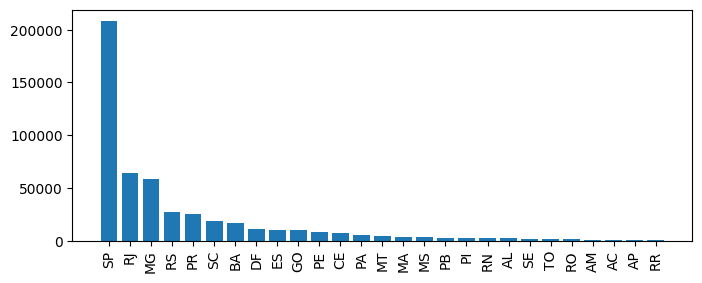

In [22]:
query = """ select customer_state , count(customer_id)
from customers group by customer_state """


cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)
plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()
